<font size = 6> Phase 3 Project:
       Acceptance and Uptake of H1N1 Influenza Vaccine

Business problem:

As shown by the ongoing Coronavirus pandemic, the need for public acceptance of emergency health direction--such as getting vaccinated--is often met with an obstinant and suspicious populace.

If we had a means of predicting who or what kind of person is likely to resist vaccination, we might be able to more effectively target our public relations and outreach campaigns.

Here we develop a predictive model to help elucidate who is likely to not get an h1n1 vaccination and present our results to a local government agency (such as a public health department) concerned with promoting vaccination during pandemic events. 

# Import Libraries

In [1]:
import warnings
from IPython.core.interactiveshell import InteractiveShell
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.pipeline import Pipeline as imbPipeline
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,\
    cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"


warnings.filterwarnings('ignore')

# Import Data and Data Understanding

Our dataframe contains 26,707 entries with 36 features, both categorical and numerical. Of the numerical, most are binary, and others are Likert scale. 

The features are as follows, taken from the Kaggle website:
age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Gender of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rentorown - Housing situation of respondent.

employment_status - Employment status of respondent.

h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioralwashhands - Has frequently washed hands or used hand sanitizer. (binary)

behaviorallargegatherings - Has reduced time at large gatherings. (binary)

behavioralantiviralmeds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioralfacemask - Has bought a face mask. (binary)

behavioraloutsidehome - Has reduced contact with people outside of own household. (binary)

behavioraltouchface - Has avoided touching eyes, nose, or mouth. (binary)

doctorrecch1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctorreccseasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronicmedcondition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

childunder6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinionh1n1vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinionh1n1risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinionh1n1sickfromvacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinionseasvacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinionseasrisk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinionseassickfromvacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

hhsgeoregion - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.


There are many issues with the data that will need taking care of--particularly missing values.

In [2]:
df = pd.read_csv(r'Data/training_set_features.csv')
labels_df = pd.read_csv(r'Data/training_set_labels.csv')
test_df = pd.read_csv(r'Data/test_set_features.csv')

In [3]:
df.head()
df.info()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Exploratory Data Analysis and Cleaning

The general idea for cleaning here is going to be setting the dataframe(s) up for the classifying algorithms; this means all columns need to be numerical, and there should be no special characters anywhere. We will be treating the test_df separately but in parallel so as to prevent leakage. There are frequent sanity checks throughout this process, just so you know.

With that in mind, we start by merging labels_df and df.

The first two columns==h1n1_concern and h1n1_knowledge== are Likert scale (a rating system scaled 1-5), that was reset to 0-4, so we're going to fix that by adding a one to each entry in the columns.

We then drop irrelevant columns and a couple of duplicated ones from the merge. Something to note here is that we've dropped a bunch of otherwise useful columns all having to do with the seasonal flu vaccine. While attitudes and behaviors with respect to the seasonal flu vaccine might have some bearing on those regarding the h1n1 pandemic flu vaccine, we are interested here solely on the pandemic flu vaccine. Following that, we check for missing values and impute via two different methods--most frequent for categorical columns and median for numerical.

Also of note. we have left in as markup cells a bit of feature engineering that ultimately proved no better or worse than the results we got. It basically involved collapsing the features involving opinions into two columns--one for seasonal and one for h1n1--and scaled 3-16. The scaling is part of the reason we decided against including it. We aren't sure how 

In [5]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df.info()
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
df = df.merge(labels_df, left_index=True, right_index=True)
df

,respondent_id_x,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_y,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


In [8]:
df['h1n1_concern'], df['h1n1_knowledge'] = df['h1n1_concern'] + \
    1, df['h1n1_knowledge']+1

test_df['h1n1_concern'], test_df['h1n1_knowledge'] = test_df['h1n1_concern'] + \
    1, test_df['h1n1_knowledge']+1

In [9]:
df

test_df

,respondent_id_x,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_y,h1n1_vaccine,seasonal_vaccine
0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,4.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,3.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,3.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,4.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [10]:
df = df.drop(['respondent_id_x', 'respondent_id_y', 'hhs_geo_region',
             'employment_industry', 'employment_occupation', 'doctor_recc_seasonal',
              'opinion_seas_vacc_effective', 'opinion_seas_risk',
              'opinion_seas_sick_from_vacc'], axis=1)

test_df = test_df.drop(['respondent_id', 'hhs_geo_region',
                        'employment_industry', 'employment_occupation', 'doctor_recc_seasonal',
                        'opinion_seas_vacc_effective', 'opinion_seas_risk',
                        'opinion_seas_sick_from_vacc'], axis=1)

In [11]:
df.isna().sum()

test_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
census_msa                         0
household_adults                 249
h

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
rent_or_own                     2036
employment_status               1471
census_msa                         0
household_adults                 225
h

In [12]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

categorical
numerical

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0,0,0
1,4.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,5.0,4.0,4.0,0.0,0.0,0,1
2,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,3.0,1.0,1.0,2.0,0.0,0,0
3,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,NaN,3.0,3.0,5.0,0.0,0.0,0,1
4,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,NaN,3.0,3.0,2.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,3.0,1.0,1.0,0.0,0.0,0,0
26703,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,4.0,2.0,2.0,1.0,0.0,0,0
26704,3.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,NaN,4.0,4.0,2.0,0.0,0.0,0,1
26705,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0.0,0,0


In [13]:
test_categorical = test_df.select_dtypes(include='object')
test_numerical = test_df.select_dtypes(exclude='object')

test_categorical
test_numerical

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa
0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City"
1,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,Non-MSA
2,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,Non-MSA
3,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City"
4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA
...,...,...,...,...,...,...,...,...,...
26703,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,"MSA, Principle City"
26704,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,Non-MSA
26705,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City"
26706,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City"


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
0,3.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,0.0
1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,0.0
2,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,1.0,0.0
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,1.0,0.0
4,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,1.0,1.0
26704,4.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,3.0
26705,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,1.0,0.0
26706,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,1.0,0.0


In [14]:
categorical = categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))
numerical = numerical.apply(lambda x: x.fillna(x.median()))

test_categorical = test_categorical.apply(
    lambda x: x.fillna(x.value_counts().index[0]))
test_numerical = test_numerical.apply(lambda x: x.fillna(x.median()))

Because the classification algorithms require numerical data, we have to somehow take care of our categorical values. We will use OneHotEncoder to transform those values into binary columns for each category of response. This increases the number of features, but at least it won't break the algorithms.

The column names already had special characters in them, but now there's more, so it seems like a good time to nix them.

Once encoded, we will merge the encoded categorical dataframes with the cleaned numerical back into df and test_df.

In [15]:
encoder = OneHotEncoder(sparse=False)
categorical_enc = pd.DataFrame(encoder.fit_transform(categorical))
categorical_enc.columns = encoder.get_feature_names_out(
    input_features=categorical.columns)

test_categorical_enc = pd.DataFrame(encoder.fit_transform(test_categorical))
test_categorical_enc.columns = encoder.get_feature_names_out(
    input_features=test_categorical.columns)

In [16]:
categorical_enc.columns = categorical_enc.columns.str.replace(
    '[-,+,>,<,=,$,]', '_', regex=True)

test_categorical_enc.columns = test_categorical_enc.columns.str.replace(
    '[-,+,>,<,=,$,]', '_', regex=True)

In [17]:
df = numerical.merge(categorical_enc, left_index=True, right_index=True)
df

test_df = test_numerical.merge(
    test_categorical_enc, left_index=True, right_index=True)
test_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,census_msa_MSA_ Not Principle City,census_msa_MSA_ Principle City,census_msa_Non_MSA
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26703,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
26704,3.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
26705,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,census_msa_MSA_ Not Principle City,census_msa_MSA_ Principle City,census_msa_Non_MSA
0,3.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26704,4.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
26705,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
26706,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


This is a proposed bit of feature engineering mentioned earlier. It has been taken out of the live code because it provided no new information or performance enhacement, but has been left in case it proves interesting for later use.

df['s_opinions'] = df['opinion_seas_sick_from_vacc'] +\
df['opinion_seas_risk'] +\
df['opinion_seas_vacc_effective']

test_df['s_opinions'] = test_df['opinion_seas_sick_from_vacc'] +\
test_df['opinion_seas_risk'] +\
test_df['opinion_seas_vacc_effective']

df['h1n1_opinions'] = df['opinion_h1n1_risk'] +\
df['opinion_h1n1_sick_from_vacc'] +\
df['opinion_h1n1_vacc_effective']

test_df['h1n1_opinions'] = test_df['opinion_h1n1_risk'] +\
test_df['opinion_h1n1_sick_from_vacc'] +\
test_df['opinion_h1n1_vacc_effective']

df = df.drop(['opinion_seas_sick_from_vacc',
                     'opinion_seas_risk',
                     'opinion_seas_vacc_effective',
                     'opinion_h1n1_risk',
                     'opinion_h1n1_sick_from_vacc',
                     'opinion_h1n1_vacc_effective'], axis=1)

test_df = test_df.drop(['opinion_seas_sick_from_vacc',
                        'opinion_seas_risk',
                        'opinion_seas_vacc_effective',
                        'opinion_h1n1_risk',
                        'opinion_h1n1_sick_from_vacc',
                        'opinion_h1n1_vacc_effective'], axis=1)

To get a feel for how the vaccination rate varies within each feature, we used this function to break down the the target into its components (0-not vaccinated, 1-vaccinated) grouped by each level of every feature. This allows us to see the rates of vaccination by level of response.

Some interesting items to note: with increasing level of response, so does vaccination rate for: h1n1_concern, opinion_h1n1_vacc_effective, opinion_h1n1_risk...also doctor recommendation. These likely hint at important features.

In [18]:
def vaccination_rate_plot(col, target, data):
    counts = (df[[target, col]]
              .groupby([target, col])
              .size()
              .unstack(target)
              )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props


for col in df.drop('h1n1_vaccine', axis=1):
    vaccination_rate_plot(col, 'h1n1_vaccine', df)

h1n1_vaccine,0,1
h1n1_concern,,
1.0,0.864381,0.135619
2.0,0.828652,0.171348
3.0,0.766664,0.233336
4.0,0.707907,0.292093


h1n1_vaccine,0,1
h1n1_knowledge,,
1.0,0.855946,0.144054
2.0,0.818200,0.181800
3.0,0.721935,0.278065


h1n1_vaccine,0,1
behavioral_antiviral_meds,,
0.0,0.791270,0.208730
1.0,0.714835,0.285165


h1n1_vaccine,0,1
behavioral_avoidance,,
0.0,0.818869,0.181131
1.0,0.775828,0.224172


h1n1_vaccine,0,1
behavioral_face_mask,,
0.0,0.795383,0.204617
1.0,0.681695,0.318305


h1n1_vaccine,0,1
behavioral_wash_hands,,
0.0,0.853978,0.146022
1.0,0.773541,0.226459


h1n1_vaccine,0,1
behavioral_large_gatherings,,
0.0,0.793065,0.206935
1.0,0.777626,0.222374


h1n1_vaccine,0,1
behavioral_outside_home,,
0.0,0.793975,0.206025
1.0,0.774858,0.225142


h1n1_vaccine,0,1
behavioral_touch_face,,
0.0,0.829681,0.170319
1.0,0.767610,0.232390


h1n1_vaccine,0,1
doctor_recc_h1n1,,
0.0,0.868773,0.131227
1.0,0.467641,0.532359


h1n1_vaccine,0,1
chronic_med_condition,,
0.0,0.811196,0.188804
1.0,0.724554,0.275446


h1n1_vaccine,0,1
child_under_6_months,,
0.0,0.795596,0.204404
1.0,0.695042,0.304958


h1n1_vaccine,0,1
health_worker,,
0.0,0.811534,0.188466
1.0,0.590548,0.409452


h1n1_vaccine,0,1
health_insurance,,
0.0,0.852535,0.147465
1.0,0.783028,0.216972


h1n1_vaccine,0,1
opinion_h1n1_vacc_effective,,
1.0,0.952596,0.047404
2.0,0.948870,0.051130
3.0,0.894347,0.105653
4.0,0.823008,0.176992
5.0,0.595172,0.404828


h1n1_vaccine,0,1
opinion_h1n1_risk,,
1.0,0.911660,0.088340
2.0,0.830018,0.169982
3.0,0.826321,0.173679
4.0,0.607898,0.392102
5.0,0.489143,0.510857


h1n1_vaccine,0,1
opinion_h1n1_sick_from_vacc,,
1.0,0.795399,0.204601
2.0,0.825493,0.174507
3.0,0.918919,0.081081
4.0,0.735726,0.264274
5.0,0.719707,0.280293


h1n1_vaccine,0,1
household_adults,,
0.0,0.803252,0.196748
1.0,0.775589,0.224411
2.0,0.799144,0.200856
3.0,0.802667,0.197333


h1n1_vaccine,0,1
household_children,,
0.0,0.787432,0.212568
1.0,0.787717,0.212283
2.0,0.780377,0.219623
3.0,0.800229,0.199771


h1n1_vaccine,0,1
seasonal_vaccine,,
0,0.931544,0.068456
1,0.622276,0.377724


h1n1_vaccine,0,1
age_group_18 _ 34 Years,,
0.0,0.782105,0.217895
1.0,0.809971,0.190029


h1n1_vaccine,0,1
age_group_35 _ 44 Years,,
0.0,0.785074,0.214926
1.0,0.802235,0.197765


h1n1_vaccine,0,1
age_group_45 _ 54 Years,,
0.0,0.783222,0.216778
1.0,0.805269,0.194731


h1n1_vaccine,0,1
age_group_55 _ 64 Years,,
0.0,0.795545,0.204455
1.0,0.757145,0.242855


h1n1_vaccine,0,1
age_group_65_ Years,,
0.0,0.792439,0.207561
1.0,0.773345,0.226655


h1n1_vaccine,0,1
education_12 Years,,
0.0,0.779866,0.220134
1.0,0.815249,0.184751


h1n1_vaccine,0,1
education__ 12 Years,,
0.0,0.78315,0.21685
1.0,0.83284,0.16716


h1n1_vaccine,0,1
education_College Graduate,,
0.0,0.807275,0.192725
1.0,0.761474,0.238526


h1n1_vaccine,0,1
education_Some College,,
0.0,0.785903,0.214097
1.0,0.792134,0.207866


h1n1_vaccine,0,1
race_Black,,
0.0,0.782057,0.217943
1.0,0.851275,0.148725


h1n1_vaccine,0,1
race_Hispanic,,
0.0,0.787231,0.212769
1.0,0.792023,0.207977


h1n1_vaccine,0,1
race_Other or Multiple,,
0.0,0.787806,0.212194
1.0,0.783499,0.216501


h1n1_vaccine,0,1
race_White,,
0.0,0.812397,0.187603
1.0,0.781123,0.218877


h1n1_vaccine,0,1
sex_Female,,
0.0,0.797769,0.202231
1.0,0.780552,0.219448


h1n1_vaccine,0,1
sex_Male,,
0.0,0.780552,0.219448
1.0,0.797769,0.202231


h1n1_vaccine,0,1
income_poverty___ _75_000_ Above Poverty,,
0.0,0.764489,0.235511
1.0,0.800291,0.199709


h1n1_vaccine,0,1
income_poverty__ _75_000,,
0.0,0.801427,0.198573
1.0,0.746990,0.253010


h1n1_vaccine,0,1
income_poverty_Below Poverty,,
0.0,0.785173,0.214827
1.0,0.808676,0.191324


h1n1_vaccine,0,1
marital_status_Married,,
0.0,0.808413,0.191587
1.0,0.771169,0.228831


h1n1_vaccine,0,1
marital_status_Not Married,,
0.0,0.771169,0.228831
1.0,0.808413,0.191587


h1n1_vaccine,0,1
rent_or_own_Own,,
0.0,0.811267,0.188733
1.0,0.780778,0.219222


h1n1_vaccine,0,1
rent_or_own_Rent,,
0.0,0.780778,0.219222
1.0,0.811267,0.188733


h1n1_vaccine,0,1
employment_status_Employed,,
0.0,0.787744,0.212256
1.0,0.787393,0.212607


h1n1_vaccine,0,1
employment_status_Not in Labor Force,,
0.0,0.791758,0.208242
1.0,0.780764,0.219236


h1n1_vaccine,0,1
employment_status_Unemployed,,
0.0,0.784707,0.215293
1.0,0.836889,0.163111


h1n1_vaccine,0,1
census_msa_MSA_ Not Principle City,,
0.0,0.787080,0.212920
1.0,0.788149,0.211851


h1n1_vaccine,0,1
census_msa_MSA_ Principle City,,
0.0,0.788091,0.211909
1.0,0.786241,0.213759


h1n1_vaccine,0,1
census_msa_Non_MSA,,
0.0,0.787380,0.212620
1.0,0.787997,0.212003


In [19]:
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children',
       'h1n1_vaccine', 'seasonal_vaccine', 'age_group_18 _ 34 Years',
       'age_group_35 _ 44 Years', 'age_group_45 _ 54 Years',
       'age_group_55 _ 64 Years', 'age_group_65_ Years', 'education_12 Years',
       'education__ 12 Years', 'education_College Graduate',
       'education_Some College', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
       'income_poverty___ _75_000_ Above Poverty', 'income_poverty__ _75_000',
       'income

# Helper Function

This function has five inputs: model, X_train, X_test, y_train, y_test. It fits given model to the training data, and predicts on an evaluation dataset to generate a classification report, prints an AUROC cross validation score, then displays a test-train ROC curve. 

Since not all models have the decision_function attribute, the function has an if-statement to separate those models out and uses the predict_proba method instead.

In [20]:
def predictions(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    print(classification_report(y_hat_test, y_test))
    print('Mean Cross-validation ROC-AUC: ',
          cross_val_score(model, X_train, y_train, scoring='roc_auc').mean())

    if hasattr(model, 'predict_proba') == True:
        y_train_score = model.predict_proba(X_train)[:, 1]
        y_test_score = model.predict_proba(X_test)[:, 1]
    else:
        y_train_score = model.decision_function(X_train)
        y_test_score = model.decision_function(X_test)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')

    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)], fontsize=10)
    plt.xticks([i/20.0 for i in range(21)], fontsize=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Data Splitting

Standard data splitting steps...30% of the data are held back for testing.

In [21]:
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=5)

# Classification Modeling

## Logistic Regression

We're using our prediction function to establish some baselines. Logistic regression is well suited to binary classification problems and provides quick and easily interpretable results. 

We have chosen AUC score as our metric. It represents the area under the ROC curve, and in ways is a summary of how well a model is performing. An auc = 1 indicates a model that predicts classes perfectly, 0 the opposite, and 0.5 representing no better than pure chance. 

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6967
           1       0.42      0.69      0.52      1046

    accuracy                           0.84      8013
   macro avg       0.68      0.77      0.71      8013
weighted avg       0.88      0.84      0.85      8013

Mean Cross-validation ROC-AUC:  0.8259717529583123
Train AUC: 0.8284700566657986
Test AUC: 0.8201300191176218
------------------------------------


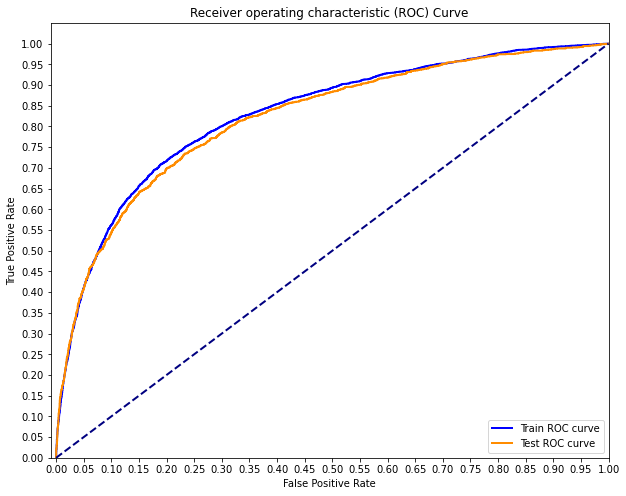

In [23]:
predictions(LogisticRegression(), X_train, X_test, y_train, y_test)

Our first AUC score is 0.82! Not bad! Let's try some other, more complicated algorithms.

## Support Vector Machine

A support vector machine is an algorithm that attempts to predict classes by maximizing the width of a hyperplane between the data. It selects data that are along the border areas of the decision boundary (so-called support vectors), and focuses on their distance. Through use of different kernels, it can work around the limitation of requiring linearly separable data. 

Below are a baseline and a demonstrator, the latter showing how wildly different the result can be when the kernel is changed. 

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      7105
           1       0.38      0.71      0.49       908

    accuracy                           0.83      8013
   macro avg       0.67      0.78      0.70      8013
weighted avg       0.89      0.83      0.86      8013

Mean Cross-validation ROC-AUC:  0.8082222290257579
Train AUC: 0.8364775486809433
Test AUC: 0.8022625455798639
------------------------------------


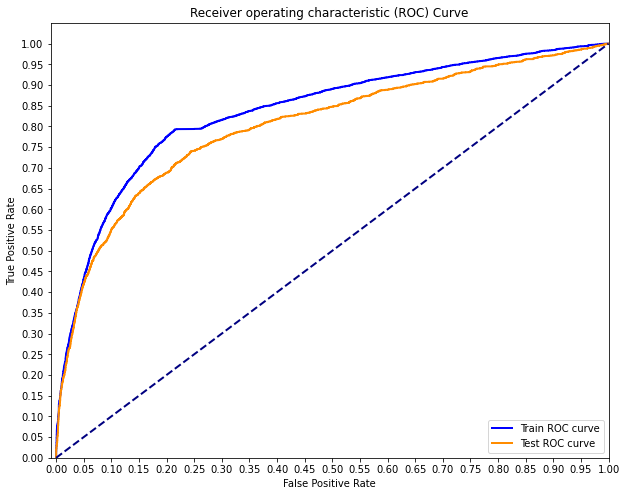

In [24]:
predictions(SVC(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      6395
           1       0.13      0.13      0.13      1618

    accuracy                           0.64      8013
   macro avg       0.45      0.45      0.45      8013
weighted avg       0.65      0.64      0.64      8013

Mean Cross-validation ROC-AUC:  0.3264326841504273
Train AUC: 0.3263455838271029
Test AUC: 0.33611049232281054
------------------------------------


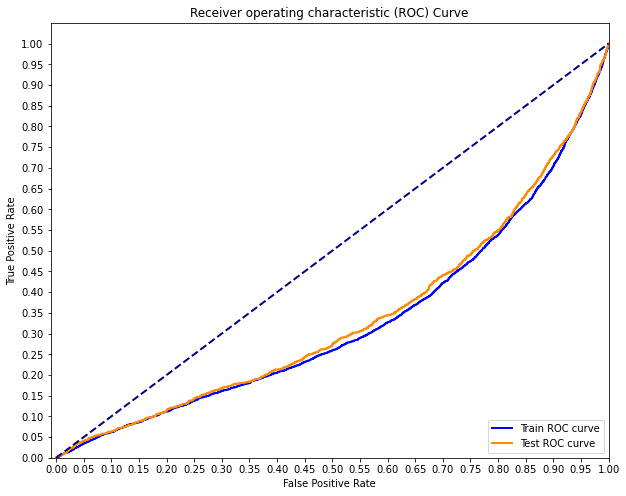

In [25]:
predictions(SVC(kernel='sigmoid'), X_train, X_test, y_train, y_test)

Ignoring the demonstrator, it's clear that a support vector machine might be do-able. It yields an auc score of around 0.80, only slightly worse than logistic regression. The amount of time taken to complete, however, makes it difficult and frustrating to run.

## Decision Tree and Random Forest

Decision Trees are prone to overfitting, as you'll see. To reduce this overfit, we will limit the tree's depth to 5 levels to establish a baseline.

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      6122
           1       0.46      0.42      0.44      1891

    accuracy                           0.75      8013
   macro avg       0.64      0.63      0.64      8013
weighted avg       0.74      0.75      0.74      8013

Mean Cross-validation ROC-AUC:  0.6388349336556824
Train AUC: 0.9999993062568285
Test AUC: 0.6428412046605672
------------------------------------


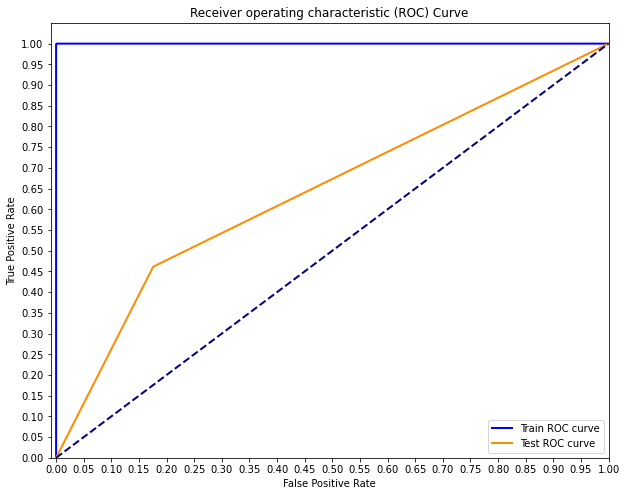

In [26]:
predictions(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      6854
           1       0.43      0.64      0.52      1159

    accuracy                           0.83      8013
   macro avg       0.68      0.75      0.71      8013
weighted avg       0.86      0.83      0.84      8013

Mean Cross-validation ROC-AUC:  0.8135843815077546
Train AUC: 0.8211499442273313
Test AUC: 0.8152524473875892
------------------------------------


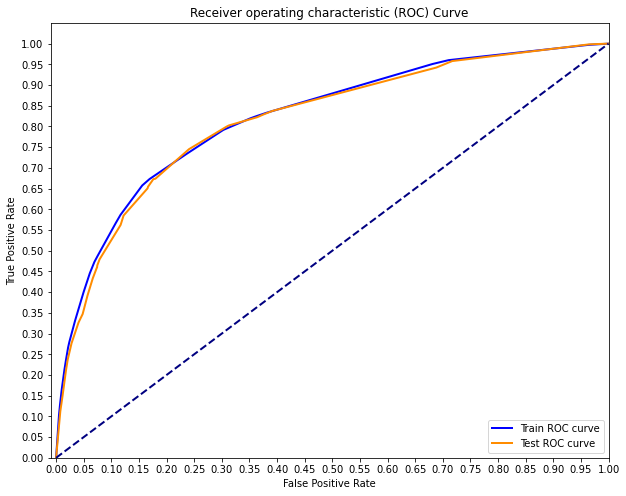

In [27]:
predictions(DecisionTreeClassifier(max_depth=5),
            X_train, X_test, y_train, y_test)

By setting the max_depth to 5, we've reduced the model's complexity and brought it back down to reality. The resulting jump in test AUC yields a better score than with logistic regression. Next we'll try a bunch of trees!

Once again we see a case of overfitting, so we'll do the same thing we did for the decision tree and reduce the maximum depth.

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7068
           1       0.38      0.69      0.49       945

    accuracy                           0.83      8013
   macro avg       0.67      0.77      0.69      8013
weighted avg       0.89      0.83      0.85      8013

Mean Cross-validation ROC-AUC:  0.8143657191869375
Train AUC: 0.9999992719979064
Test AUC: 0.8084033883095567
------------------------------------


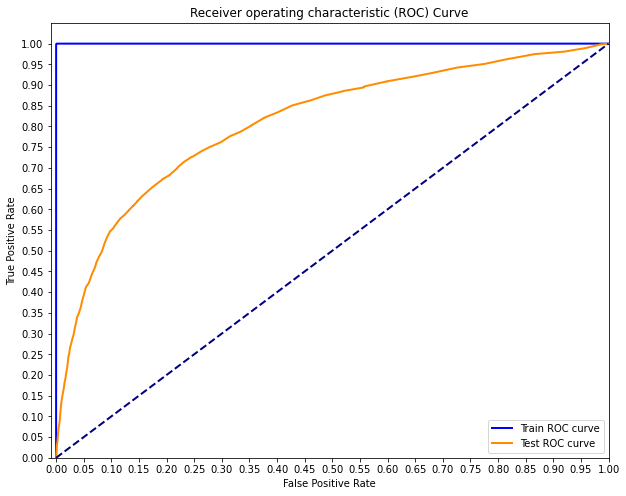

In [28]:
predictions(RandomForestClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7507
           1       0.23      0.76      0.35       506

    accuracy                           0.82      8013
   macro avg       0.60      0.79      0.62      8013
weighted avg       0.93      0.82      0.86      8013

Mean Cross-validation ROC-AUC:  0.8231202032752989
Train AUC: 0.8356924369643972
Test AUC: 0.8190185650710461
------------------------------------


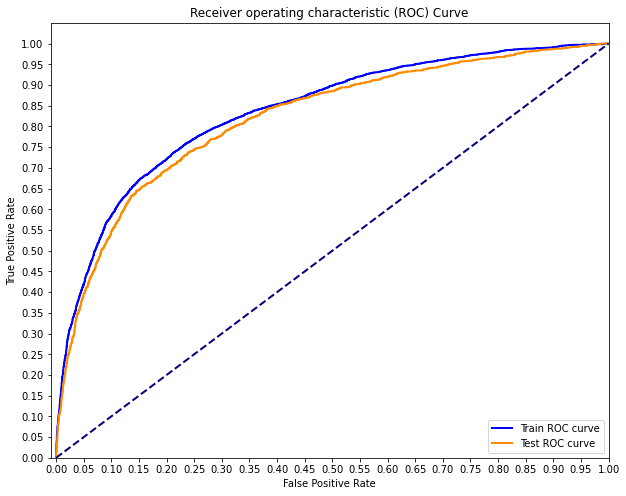

In [29]:
predictions(RandomForestClassifier(max_depth=6),
            X_train, X_test, y_train, y_test)

So far there is no stand-out model, though the tree-based runs seem to have a slight edge. We will continue exploring decision tree models.

## Gradient Boosting and XtremeGradientBoosting

Decision Tree and Random Forest performed well, so it makes sense to try a couple of other decision tree algorithms.

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6919
           1       0.44      0.69      0.54      1094

    accuracy                           0.84      8013
   macro avg       0.69      0.78      0.72      8013
weighted avg       0.88      0.84      0.85      8013

Mean Cross-validation ROC-AUC:  0.8314627865431119
Train AUC: 0.8440807768512053
Test AUC: 0.8286483691223794
------------------------------------


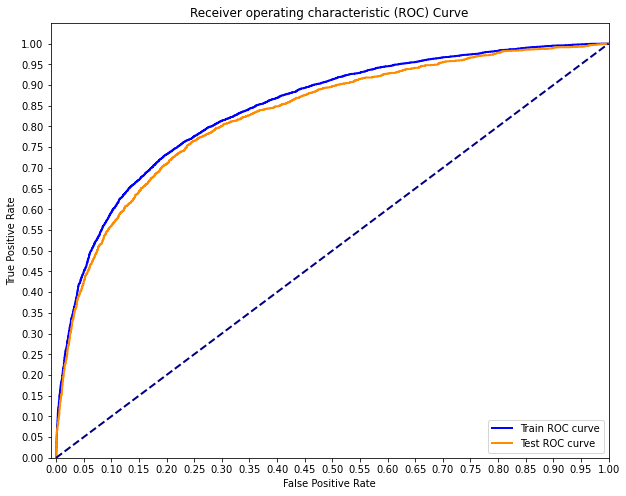

In [30]:
predictions(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      6782
           1       0.46      0.64      0.54      1231

    accuracy                           0.83      8013
   macro avg       0.70      0.75      0.72      8013
weighted avg       0.86      0.83      0.84      8013

Mean Cross-validation ROC-AUC:  0.8144509912959286
Train AUC: 0.9224424596994741
Test AUC: 0.8143177112421149
------------------------------------


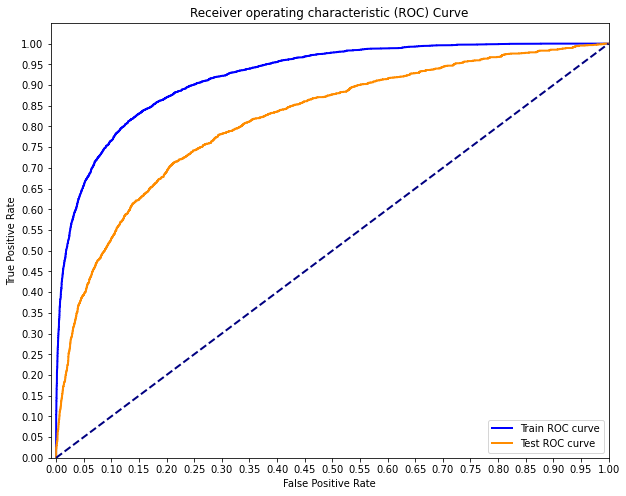

In [31]:
predictions(XGBClassifier(max_depth=5), X_train, X_test, y_train, y_test)

GradientBoostingClassifier is the winner here. With an AUC score of 0.83, its classifications are more reliable than any models explored thus far. We will use this for hyperparameter tuning.

# Tuning GradientBoostingClassifier

We're using GridSearchCV to go through possible values of hyperparameter and selecting the best combination. The algorithm is resource-sucking, so to reduce computation time, we are limiting each grid search to one or two hyperparameters, then adding in the results and moving on to the next couple parameters.

For GradientBoostingClassifier we will focus on the most important hyperparameters:
1. max_depth: The number of layers of nodes/leaves in the tree.
2. learning rate: Weight assigned to each tree generated after boosting.
3. min_samples_split: The mininmum number of samples required to split an internal node.
4. min_samples_leaf: The minimum number of samples required to be in a leaf.
5. max_features: How many features will be considered while splitting--randomly selected.
6. subsample: Percentage of observations considered for each tree.
7. n_estimators: How many trees are made

At the very end, we add in a couple extras that tend to be less important...that is to say, impactful. We will use our tuned model to fit and run on our test data.

In [32]:
parameters = {'max_features': ['auto', 'log2', 'sqrt', 'none'],
              'learning_rate': np.linspace(0.01, 1, 20),
              # 'max_depth': [2,4,6,8,10],
              # min_samples_leaf: [50, 100, 200, 500, 1000]
              # min_samples_split: [50, 100, 200, 500, 1000]
              # 'n_estimators': [100,200,400,500,750,800,1000]
              }

search = GridSearchCV(GradientBoostingClassifier(
), param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3)
search.fit(X_train, y_train)
search.best_estimator_
search.best_score_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                         'max_features': ['auto', 'log2', 'sqrt', 'none']},
             scoring='roc_auc', verbose=3)

GradientBoostingClassifier(learning_rate=0.16631578947368422,
                           max_features='auto')

0.8317101136757928

In [33]:
parameters = {'max_features': ['auto'],
              'learning_rate': [0.166],
              'max_depth': [2, 4, 6, 8, 10],
              'n_estimators': [100, 200, 400, 500, 750, 800, 1000]}
search = GridSearchCV(GradientBoostingClassifier(
), param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=3, verbose=5)
search.fit(X_train, y_train)
search.best_estimator_
search.best_score_

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.166],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto'],
                         'n_estimators': [100, 200, 400, 500, 750, 800, 1000]},
             scoring='roc_auc', verbose=5)

GradientBoostingClassifier(learning_rate=0.166, max_depth=2,
                           max_features='auto', n_estimators=200)

0.8309346161492955

In [34]:
parameters = {'min_samples_leaf': [50, 100, 200, 500, 1000],
              'min_samples_split': [50, 100, 200, 500, 1000],
              'max_features': ['auto'],
              'learning_rate': [0.166],
              'max_depth': [2],
              'n_estimators': [200]}
search = GridSearchCV(GradientBoostingClassifier(
), param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=3, verbose=4)
search.fit(X_train, y_train)
search.best_estimator_
search.best_score_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.166], 'max_depth': [2],
                         'max_features': ['auto'],
                         'min_samples_leaf': [50, 100, 200, 500, 1000],
                         'min_samples_split': [50, 100, 200, 500, 1000],
                         'n_estimators': [200]},
             scoring='roc_auc', verbose=4)

GradientBoostingClassifier(learning_rate=0.166, max_depth=2,
                           max_features='auto', min_samples_leaf=50,
                           min_samples_split=50, n_estimators=200)

0.8311994082425738

In [35]:
parameters = {'min_samples_leaf': [50],
              'min_samples_split': [50],
              'max_features': ['auto'],
              'learning_rate': [0.166],
              'max_depth': [2],
              'n_estimators': [200],
              'subsample': np.linspace(0.1, 1, 12)}
search = GridSearchCV(GradientBoostingClassifier(
), param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=3, verbose=4)
search.fit(X_train, y_train)
search.best_estimator_
search.best_score_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.166], 'max_depth': [2],
                         'max_features': ['auto'], 'min_samples_leaf': [50],
                         'min_samples_split': [50], 'n_estimators': [200],
                         'subsample': array([0.1       , 0.18181818, 0.26363636, 0.34545455, 0.42727273,
       0.50909091, 0.59090909, 0.67272727, 0.75454545, 0.83636364,
       0.91818182, 1.        ])},
             scoring='roc_auc', verbose=4)

GradientBoostingClassifier(learning_rate=0.166, max_depth=2,
                           max_features='auto', min_samples_leaf=50,
                           min_samples_split=50, n_estimators=200,
                           subsample=0.509090909090909)

0.8316709559211285

In [36]:
parameters = {'warm_start': [True, False],
              'max_leaf_nodes': [2, 4, 6, 8, 10],
              'criterion': ['friedman_mse', 'mse'],
              'loss': ['exponential', 'log_loss', 'deviance'],
              'min_samples_leaf': [50],
              'min_samples_split': [50],
              'max_features': ['auto'],
              'learning_rate': [0.166],
              'max_depth': [2],
              'n_estimators': [200],
              'subsample': [0.591]}
search = GridSearchCV(GradientBoostingClassifier(
), param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=3, verbose=4)
search.fit(X_train, y_train)
search.best_estimator_
search.best_score_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.166],
                         'loss': ['exponential', 'log_loss', 'deviance'],
                         'max_depth': [2], 'max_features': ['auto'],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [50], 'min_samples_split': [50],
                         'n_estimators': [200], 'subsample': [0.591],
                         'warm_start': [True, False]},
             scoring='roc_auc', verbose=4)

GradientBoostingClassifier(criterion='mse', learning_rate=0.166, max_depth=2,
                           max_features='auto', max_leaf_nodes=4,
                           min_samples_leaf=50, min_samples_split=50,
                           n_estimators=200, subsample=0.591, warm_start=True)

0.8321329678017754

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6905
           1       0.44      0.69      0.54      1108

    accuracy                           0.84      8013
   macro avg       0.69      0.77      0.72      8013
weighted avg       0.88      0.84      0.85      8013

Mean Cross-validation ROC-AUC:  0.8309732964500418
Train AUC: 0.8446217337950546
Test AUC: 0.8259658368267309
------------------------------------


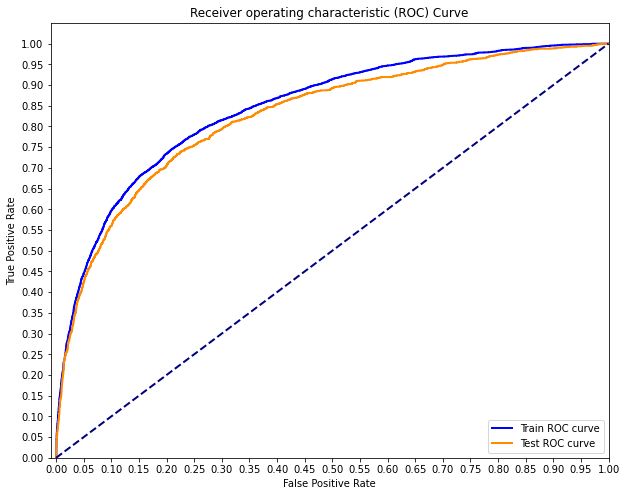

In [37]:
predictions(GradientBoostingClassifier(learning_rate=0.166, loss='deviance',
                                       max_depth=2, max_features='auto', max_leaf_nodes=4,
                                       min_samples_leaf=50, min_samples_split=50,
                                       n_estimators=200, subsample=0.591, warm_start=True), X_train, X_test, y_train, y_test)

After tuning, our metric has gone up only 0.01 points to 0.83. A respectable auc score, sure, but it seems stuck at this level.

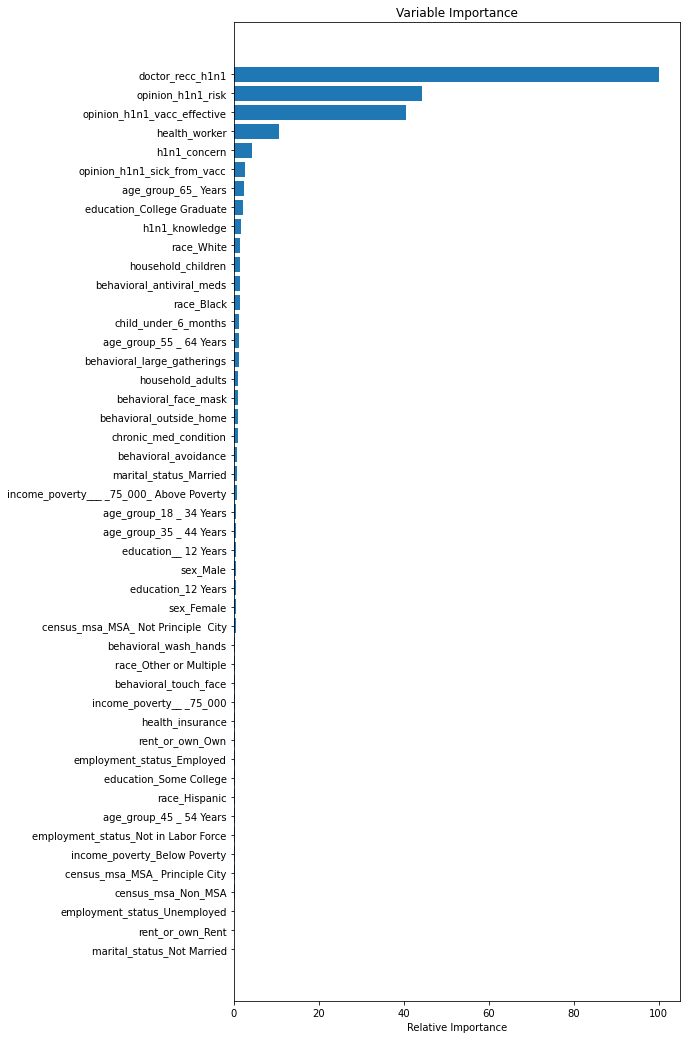

In [38]:
clf = GradientBoostingClassifier(learning_rate=0.166, loss='deviance',
                                 max_depth=2, max_features='auto', max_leaf_nodes=4,
                                 min_samples_leaf=50, min_samples_split=50,
                                 n_estimators=200, subsample=0.591, warm_start=True)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Predictions on Test Data with Best Performing Model

Two make predictions using our model, we first store our whole test_df (which is just features) in x, retrain our model on the training data, and predict on x. We predicted both classes and probabilities. We stored the results in separate dataframes for readability.

Finally, we created one last dataframe that included the predicted classes so we could do a breakdown of the features by predicted vaccination status. From there we draw the information to make our final recommendations

Ultimately, we were only able to boost our model's AUC by about 0.005 points. With only our data, 0.83 seems to be the ceiling. Even when using SMOTE, which we have left out of this notebook, the test AUC refused to budge any higher. 
Potentially, some of the noisier features confound the models and blur the lines between the two classes so much that they refuse separation. Future work on this dataset might include more feature engineering and paring down the number of features as a whole.

In [39]:
x = test_df

In [40]:
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=5)

In [41]:
model = (GradientBoostingClassifier(learning_rate=0.166, loss='deviance',
                                    max_depth=2, max_features='auto', max_leaf_nodes=4,
                                    min_samples_leaf=50, min_samples_split=50,
                                    n_estimators=200, subsample=0.591, warm_start=True))
m = model.fit(X_train, y_train)
y_pred = m.predict_proba(x)
y_class = m.predict(x)

In [42]:
preds = pd.DataFrame(y_pred, columns=['unvaccinated', 'vaccinated'])
preds

,unvaccinated,vaccinated
0,0.900675,0.099325
1,0.965178,0.034822
2,0.441682,0.558318
3,0.469430,0.530570
4,0.785599,0.214401
...,...,...
26703,0.669800,0.330200
26704,0.869290,0.130710
26705,0.912978,0.087022
26706,0.946837,0.053163


In [43]:
classes = pd.DataFrame(y_class, columns=['vaccination_status'])
classes.value_counts()
classes

vaccination_status
0                     23200
1                      3508
dtype: int64

,vaccination_status
0,0
1,0
2,1
3,1
4,0
...,...
26703,0
26704,0
26705,0
26706,0


Our model predicts that 23,200 patients remain unvaccinated, and 3508 will vaccinate.

In [44]:
test_df_final = classes.merge(test_df, left_index=True, right_index=True)
test_df_final

,vaccination_status,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,census_msa_MSA_ Not Principle City,census_msa_MSA_ Principle City,census_msa_Non_MSA
0,0,3.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26704,0,4.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
26705,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
26706,0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [45]:
def vaccination_rate_plot(col, target, data):
    counts = (test_df_final[[target, col]]
              .groupby([target, col])
              .size()
              .unstack(target)
              )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props


for col in test_df_final.drop('vaccination_status', axis=1):
    vaccination_rate_plot(col, 'vaccination_status', test_df_final)

vaccination_status,0,1
h1n1_concern,,
1.0,0.927165,0.072835
2.0,0.908924,0.091076
3.0,0.848171,0.151829
4.0,0.803670,0.196330


vaccination_status,0,1
h1n1_knowledge,,
1.0,0.956593,0.043407
2.0,0.905023,0.094977
3.0,0.789700,0.210300


vaccination_status,0,1
behavioral_antiviral_meds,,
0.0,0.872174,0.127826
1.0,0.801059,0.198941


vaccination_status,0,1
behavioral_avoidance,,
0.0,0.896075,0.103925
1.0,0.858612,0.141388


vaccination_status,0,1
behavioral_face_mask,,
0.0,0.876705,0.123295
1.0,0.760411,0.239589


vaccination_status,0,1
behavioral_wash_hands,,
0.0,0.936179,0.063821
1.0,0.854463,0.145537


vaccination_status,0,1
behavioral_large_gatherings,,
0.0,0.870914,0.129086
1.0,0.864467,0.135533


vaccination_status,0,1
behavioral_outside_home,,
0.0,0.872469,0.127531
1.0,0.861120,0.138880


vaccination_status,0,1
behavioral_touch_face,,
0.0,0.914823,0.085177
1.0,0.847448,0.152552


vaccination_status,0,1
doctor_recc_h1n1,,
0.0,0.972037,0.027963
1.0,0.466886,0.533114


vaccination_status,0,1
chronic_med_condition,,
0.0,0.893342,0.106658
1.0,0.802319,0.197681


vaccination_status,0,1
child_under_6_months,,
0.0,0.880031,0.119969
1.0,0.744072,0.255928


vaccination_status,0,1
health_worker,,
0.0,0.896927,0.103073
1.0,0.635640,0.364360


vaccination_status,0,1
health_insurance,,
0.0,0.939002,0.060998
1.0,0.864102,0.135898


vaccination_status,0,1
opinion_h1n1_vacc_effective,,
1.0,0.997828,0.002172
2.0,1.000000,NaN
3.0,0.978079,0.021921
4.0,0.925981,0.074019
5.0,0.645718,0.354282


vaccination_status,0,1
opinion_h1n1_risk,,
1.0,0.985500,0.014500
2.0,0.930343,0.069657
3.0,0.925203,0.074797
4.0,0.672365,0.327635
5.0,0.493468,0.506532


vaccination_status,0,1
opinion_h1n1_sick_from_vacc,,
1.0,0.873419,0.126581
2.0,0.910385,0.089615
3.0,0.968944,0.031056
4.0,0.819120,0.180880
5.0,0.792093,0.207907


vaccination_status,0,1
household_adults,,
0.0,0.893995,0.106005
1.0,0.852148,0.147852
2.0,0.874216,0.125784
3.0,0.891821,0.108179


vaccination_status,0,1
household_children,,
0.0,0.868802,0.131198
1.0,0.860595,0.139405
2.0,0.872569,0.127431
3.0,0.875277,0.124723


vaccination_status,0,1
age_group_18 _ 34 Years,,
0.0,0.863509,0.136491
1.0,0.889759,0.110241


vaccination_status,0,1
age_group_35 _ 44 Years,,
0.0,0.865555,0.134445
1.0,0.886398,0.113602


vaccination_status,0,1
age_group_45 _ 54 Years,,
0.0,0.863549,0.136451
1.0,0.889481,0.110519


vaccination_status,0,1
age_group_55 _ 64 Years,,
0.0,0.877992,0.122008
1.0,0.832881,0.167119


vaccination_status,0,1
age_group_65_ Years,,
0.0,0.873287,0.126713
1.0,0.854868,0.145132


vaccination_status,0,1
education_12 Years,,
0.0,0.864820,0.135180
1.0,0.882786,0.117214


vaccination_status,0,1
education__ 12 Years,,
0.0,0.862670,0.137330
1.0,0.931079,0.068921


vaccination_status,0,1
education_College Graduate,,
0.0,0.887727,0.112273
1.0,0.843785,0.156215


vaccination_status,0,1
education_Some College,,
0.0,0.865498,0.134502
1.0,0.877401,0.122599


vaccination_status,0,1
race_Black,,
0.0,0.862843,0.137157
1.0,0.934223,0.065777


vaccination_status,0,1
race_Hispanic,,
0.0,0.866627,0.133373
1.0,0.898415,0.101585


vaccination_status,0,1
race_Other or Multiple,,
0.0,0.869092,0.130908
1.0,0.861438,0.138562


vaccination_status,0,1
race_White,,
0.0,0.902349,0.097651
1.0,0.860100,0.139900


vaccination_status,0,1
sex_Female,,
0.0,0.886426,0.113574
1.0,0.856448,0.143552


vaccination_status,0,1
sex_Male,,
0.0,0.856448,0.143552
1.0,0.886426,0.113574


vaccination_status,0,1
income_poverty___ _75_000_ Above Poverty,,
0.0,0.845591,0.154409
1.0,0.881253,0.118747


vaccination_status,0,1
income_poverty__ _75_000,,
0.0,0.883799,0.116201
1.0,0.824858,0.175142


vaccination_status,0,1
income_poverty_Below Poverty,,
0.0,0.865216,0.134784
1.0,0.900894,0.099106


vaccination_status,0,1
marital_status_Married,,
0.0,0.894692,0.105308
1.0,0.848299,0.151701


vaccination_status,0,1
marital_status_Not Married,,
0.0,0.848299,0.151701
1.0,0.894692,0.105308


vaccination_status,0,1
rent_or_own_Own,,
0.0,0.891951,0.108049
1.0,0.861974,0.138026


vaccination_status,0,1
rent_or_own_Rent,,
0.0,0.861974,0.138026
1.0,0.891951,0.108049


vaccination_status,0,1
employment_status_Employed,,
0.0,0.871521,0.128479
1.0,0.866450,0.133550


vaccination_status,0,1
employment_status_Not in Labor Force,,
0.0,0.871630,0.128370
1.0,0.863753,0.136247


vaccination_status,0,1
employment_status_Unemployed,,
0.0,0.865370,0.134630
1.0,0.923331,0.076669


vaccination_status,0,1
census_msa_MSA_ Not Principle City,,
0.0,0.869706,0.130294
1.0,0.867349,0.132651


vaccination_status,0,1
census_msa_MSA_ Principle City,,
0.0,0.868381,0.131619
1.0,0.869315,0.130685


vaccination_status,0,1
census_msa_Non_MSA,,
0.0,0.868126,0.131874
1.0,0.870145,0.129855


# Recommendations

Based on the data and our prediction modeling, we recommend the following to increase h1n1 vaccination acceptance:

1. Doctor recommendation was the single greatest influencing factor in whether or not a patient got the shot. Reach out to the medical community, doctor's unions, and hospitals with PR campaigns and CE courses about how important their interactions with patients are. Offer workshops on bedside manner and communicating with patients, and how to best educate those they see in practice.


2. People's own personal opinions also have a huge influence on their eventual vaccination status. Invest in effective PSA's and advertisements that not just warn, but educate the public on the importance of vaccination, and on the realities of pandemic flu. Heighten public health agencies' and officials' social media profiles and presence, as that's where many people begin to form opinions.


3. Increase the availability of health resources available to lower-income and people of color, two groups who tend to be at disproportionate risk of serious illness, and for whom vaccination rates remain low. Develop cost-saving vaccination programs or waive payments entirely for the vaccine, and open vaccination clinics in locations convenient to them, as many may not have adequate transportation. Extend existing clinic hours so that workers who may not be able to leave during hours have the opportunity to get vaccinated.